# Day and Night Image Classifier
The day/night set has 200 color images of day and night.
Aim is to classify them and label them accurately.

## Import modules and resources:


In [18]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

%matplotlib inline

# appending the path to image
#import sys
#print('All modules imported successfully')
#sys.path.insert(0,r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_1_Image_Representation\day_night_images\ ')
#print(sys.path)


## loading the data set

In [19]:

# Image directories
image_dir_training = r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_1_Image_Representation\day_night_images\training'
image_dir_test = r'D:\00_Python Scripts\Test\udacity_nano_computervision\CVND_Exercises-master\1_1_Image_Representation\day_night_images\test'

def load_dataset(folder):
    
    # populate this image list
    im_list = []
    image_types = ['day','night']
    
    # iterate 
    for image_type in image_types:
        # use glob to read images from each folder and append the image with its type
        for file in glob.glob(os.path.join(folder,image_type,'*')):
            im = mpimg.imread(file)
            
            if im is not None:
                # append image type and image to a list
                im_list.append((im, image_type))
                
    return im_list


#### Test if we can access the image folders

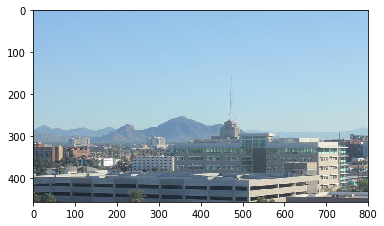

In [20]:
img_load_test = mpimg.imread(os.path.join(image_dir_test,'day','20151101_152050.jpg')) 
plt.imshow(img_load_test)
       

## Generate the image set for training and testing

In [21]:
image_list_training = load_dataset(image_dir_training)
image_list_test = load_dataset(image_dir_test)
print('length of the image list for training',len(image_list_training))


length of the image list for training 240


## 1. Visualize the input images

selected image shape (458, 800, 3) type: day


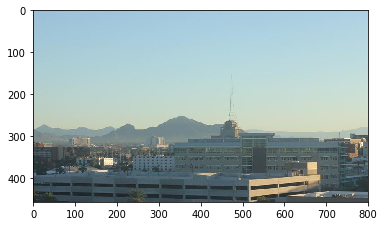

In [22]:
image_index = 0
selected_image = image_list_training[image_index][0]
selected_label = image_list_training[image_index][1]

plt.imshow(selected_image)
print('selected image shape',selected_image.shape,'type:', selected_label)


#### TODOs:
Display one night image

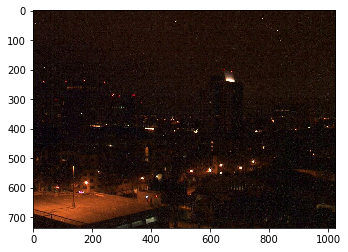

In [23]:
query_label = 'night'

for im_list in image_list_training:
    if im_list[1] == query_label:
        query_image= im_list[0]
        plt.imshow(query_image)
        break
        
    

## Preprocess the Data
After loading the each image, we have to standardize the input and output

### Input 
1. Make all the images of the same size (600 x 1100)(h x w)
2. All images of the same image type


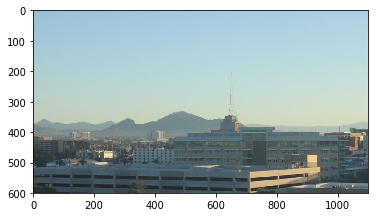

In [24]:
# resize each image to a desired input size
def standardize_input(image):
    standard_im = cv2.resize(image,(1100, 600))#, interpolation= 'cubic')
    return standard_im
# test with one image
standardized_image = standardize_input(selected_image)
plt.imshow(standardized_image)


### Standardize the output
With each image the expected output is encoded as 0/1 for night/day


In [25]:
def encode(label):
    if label == 'day':
        numerical_val = 1
    else :
        numerical_val = 0
    return numerical_val


### Construct a standardized list of input images and output labels

In [26]:
def standardize(image_list):
    standard_list = []
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # resize the image
        image = standardize_input(image)
        label = encode(label)
        
        standard_list.append((image, label))
        
    return standard_list
# standardize all images from training
standardized_list = standardize(image_list_training)


### Visualize the standard data
Display a standardized image from standradized_list

shape: (600, 1100, 3) label: 0


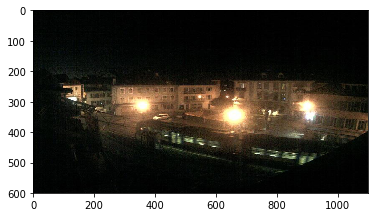

In [27]:
image_num = 190
selected_image = standardized_list[image_num][0]
selected_label = standardized_list[image_num][1]
plt.imshow(selected_image)
print('shape:',selected_image.shape,'label:', selected_label)

## Feature extraction
 Create a feature that represents the brightness of an image. We'll be extracting the **average brightness** using HSV colorspace
We will use the V channel(a measure of brigthness) and find its average

### RGB to HSV conversion

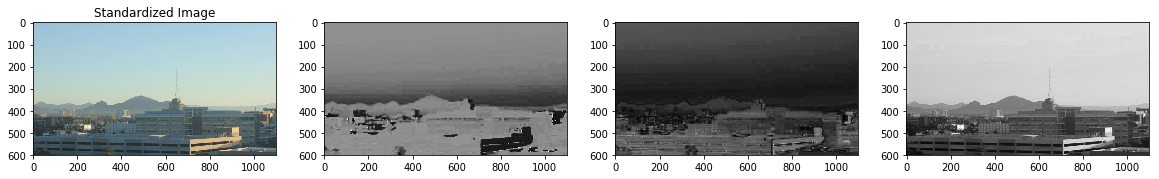

In [29]:
# convert image to HSV colorspace 
# Visualize the individual color channels

image_num = 0 # 190 for night images
test_im = standardized_list[image_num][0]
test_label = standardized_list[image_num][1]

# convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,10))
ax1.set_title('Standardized Image')
ax1.imshow(test_im)
ax2.imshow(h, cmap = 'gray')
ax3.imshow(s, cmap = 'gray')
ax4.imshow(v, cmap = 'gray')


## Find the average brightness using V channel


average brightness:  175.1298712121212


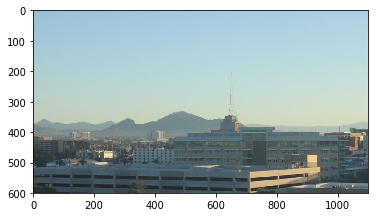

In [30]:
def average_brightness(rbg_image):
    # convert rbg to hsv
    hsv_image = cv2.cvtColor(rbg_image, cv2.COLOR_RGB2HSV)
    # sum up all pixel values in V channel
    sum_brigthness = np.sum(hsv_image[:,:,2])
    area = 600 * 1100 #pixels
    return sum_brigthness/area

avg = average_brightness(test_im)
plt.imshow(test_im)
print('average brightness: ',avg)

## Classification
Input the average brightness feature into the classifier and return a predicted label.

estimated label 1


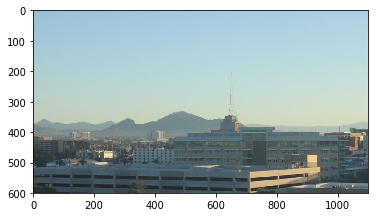

In [31]:
# this function estimates the label
def estimate_label(rgb_image):
    avg_brightness = average_brightness(rgb_image)
    threshold = 100
    if avg_brightness >= threshold:
        predicted_label = 1
    else:
        predicted_label = 0
        
    return predicted_label
plt.imshow(test_im)
print('estimated label',estimate_label(test_im))
 

## Accuracy of the Classifier   
Accuracy is found by the no of correct prediction/ total no of images

we'll aim for 75- 85 % accuracy using this one feature
## Test dataset
we standardize all the test images and shuffle them


In [32]:
import random

# standardize the test data set
standardized_list_test = standardize(image_list_test)
# shuffle the test data set
random.shuffle(standardized_list_test)


## Determine the Accuracy

Compare the output of your classification algorithm('model') with the true label and determine the accuracy

In [33]:
def get_misclassified_images(test_images):
    misclassified_images_labels = []
    
    # Iterate through all the test images
    # classify each image and compare the true label
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        # get predicted label from your classifier
        predicted_label = estimate_label(im)
        
        if (predicted_label != true_label):
            misclassified_images_labels.append((im,predicted_label, true_label))
    return misclassified_images_labels


In [34]:
# find all misclassified images in the given dataset.
misclassified_list = get_misclassified_images(standardized_list_test)
# accuracy calculations:
total = len(standardized_list_test)
correct = total -len(misclassified_list)
accuracy = correct/total

print('Accuracy:', accuracy)
print('number of misclassified images',len(misclassified_list),'out of', len(standardized_list_test))
    

Accuracy: 0.925
number of misclassified images 12 out of 160


## Visualize the misclassified images:

average 176.83844242424243
predicted 1 true 0


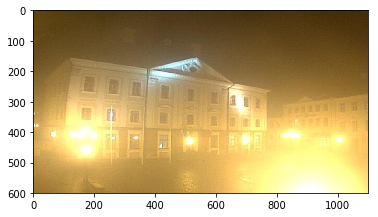

In [35]:
num = 0
test_mis_im = misclassified_list[num][0]
test_mis_pred_label = misclassified_list[num][1]
test_mis_true_label = misclassified_list[num][2]
plt.imshow(test_mis_im)
print('average',average_brightness(test_mis_im))
print('predicted',test_mis_pred_label,'true', test_mis_true_label)
